## Project description

App Procrastinate Pro+ has been losing money for the past few months, despite large investments in advertising.

**Target** - sort out the reasons and help the company to become a plus

### Problems

- Definition of a portrait of users (where they come from and what devices they use)
- Check ROI
- Identification of factors hindering customer acquisition.

### Data description

There are three datasets available. Data about users attracted from May 1 to October 27, 2019

- *visits_info_short.csv* stores a server log with information about site visits,
- *orders_info_short.csv* — contains order information
- *costs_info_short.csv* — advertising spending information

Structure of **visits_info_short.csv**:
- User Id — unique user ID,
- Region — country of user,
- Device — user device type,
- Channel — идентификатор источника перехода,
- Session Start — session start date and time,
- Session End — session end date and time.

Structure of **orders_info_short.csv**:
- User Id — unique user ID,
- Event Dt — date and time of purchase,
- Revenue — order price.

Structure **costs_info_short.csv**:
- dt — date of the campaign,
- Channel — advertising source ID,
- costs — spending on this campaign.

### Work plan

1) [Understanding the data](#intro)

2) [Data pre-processing:](#pre-processing)

- Data formating
- Handling missing values
- Duplicate Handling
- Processing of abnormal values

3) [Functions creation](#functions)

Functions for Calculating Metric Values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — for Retention Rate counting,
- `get_conversion()` — for conversion rate counting,
- `get_ltv()` — for LTV counting.

Graph Functions:

- `filter_data()` — for data smoothing,
- `plot_retention()` — Retention Rate plot,
- `plot_conversion()` — conversion rate plot,
- `plot_ltv_roi` — for LTV and ROI visualization.

4) [Exploratory data analysis](#EDA)

- Determining user acquisition dates
- Determination of countries for attracting users and the share of paying customers in them
- Identification of user devices and share of paying customers in them
- Identification of the channels from which users came and the share of paying customers in them

5) [Marketing](#Marketing)

- Estimation of total marketing spend
- Analysis of costs by sources of attraction
- Cost visualization
- Determination of the average cost of attracting one user

6) [ROI Estimation](#ROI)

- Analysis of the return on advertising in general (c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
- Analysis of conversion and retention of users and their dynamics.
- Ad return of investment analysis by device.
- Analysis of advertising ROI by country.
- Analysis of advertising ROI by advertising channels.

7) [Conclusion](#concl)

## Understanding the data <a id='intro'></a>

Load data and install required libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Look at each table

In [3]:
visits.info()
visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In the table **visits**:
- there are no missing values
- column names are not formatted according to the canon (change capital letters to lowercase and apply snake font)
- the data type needs to be changed in the columns session_start and session_end

In [4]:
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


The same for table **orders** (the data type needs to be changed in the column event_dt)

In [5]:
costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


And the same for **costs**. Change the data type in dt

**Thus, first of all, it is necessary to change the names of the columns and data types of the above columns**

### Data pre-processing:<a id='pre-processing'></a>

#### Changing columns names

In [6]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

visits.columns, orders.columns, costs.columns

(Index(['user id', 'region', 'device', 'channel', 'session start',
        'session end'],
       dtype='object'),
 Index(['user id', 'event dt', 'revenue'], dtype='object'),
 Index(['dt', 'channel', 'costs'], dtype='object'))

In [7]:
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})

orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

#### Data formating

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Duplicate Handling

Examining data for obvious duplicates

In [9]:
visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()

(0, 0, 0)

Let's look at possible implicit duplicates

In [10]:
col = ['region','device', 'channel']
for i in col:
    print(visits[i].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [11]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

No duplicates found

## Functions creation<a id='functions'></a>

Functions for Calculating Metric Values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — for Retention Rate counting,
- `get_conversion()` — for conversion rate counting,
- `get_ltv()` — for LTV counting.

Graph Functions:

- `filter_data()` — for data smoothing,
- `plot_retention()` — Retention Rate plot,
- `plot_conversion()` — conversion rate plot,
- `plot_ltv_roi` — for LTV and ROI visualization.

In [12]:
def get_profiles(sessions, orders, ad_costs):

    # find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visitation occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine advertising spending and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the ['payer'] column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get customer retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # we get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return two tables and raw data
    return result_raw, result_grouped, result_in_time 

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # exclude users who did not "survive" to the analysis horizon
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group according to cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return tables and raw data
    return result_raw, result_grouped, result_in_time 

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    #we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # we build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table, we leave the cohort sizes, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # table LTV
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # table of ROI dynamics
    ) 

Graph functions

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    
    #for each column apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the table of dynamics we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the retention table indexes,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the table of graphs there are two columns and two rows, four cells
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we build retention curves for non-payers
    # vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell there is the dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and plotting
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of retention of paying users on the {}-th day'.format(
            horizon
        )
    )

    # in the fourth cell there is the dynamics of retention of non-paying
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering data and plotting
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of retention of non-paying users on the {}-th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the table of dynamics we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph shows conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the second graph is the dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing graphs
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # write the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # from the table roi we exclude the sizes of cohorts and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph shows ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second graph shows the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User LTV dynamics on the {} day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('User acquisition costs dynamics')

    # the fourth graph includs roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # the fifth graph is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of ROI of users on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Exploratory data analysis<a id='EDA'></a>

Create user profiles

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [21]:
profiles['dt'].max(), profiles['dt'].min()

(datetime.date(2019, 10, 27), datetime.date(2019, 5, 1))

The dataset contains data from 01/05/2019 to 27/10/2019

Let's analyze paying users by country

In [22]:
users_region = profiles.groupby(by='region').agg({'user_id':'nunique', 'payer':'sum'}).sort_values(by='user_id', ascending = False).rename(columns={'user_id':'users_total', 'payer':'paying_users'})
users_region['share_of_paying_users'] = users_region['paying_users']/users_region['users_total'] * 100
users_region

,users_total,paying_users,share_of_paying_users
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


The larger market is the US market. The number of users in the UK and France is approximately equal, the smallest in Germany. The share of paying users is also the highest in the US. Then comes Germany, then Great Britain and France.

Let's look at the devices used by users

In [23]:
users_device = profiles.groupby(by='device').agg({'user_id':'nunique', 'payer':'sum'}).sort_values(by='user_id', ascending = False).rename(columns={'user_id':'users_total', 'payer':'paying_users'})
users_device['share_of_paying_users'] = users_device['paying_users']/users_device['users_total'] * 100
users_device

,users_total,paying_users,share_of_paying_users
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


Most clients use iPhone, but the highest share of paying users use Mac

Now let's look at the acquisition channels

In [24]:
users_channel = profiles.groupby(by='channel').agg({'user_id':'nunique', 'payer':'sum'}).sort_values(by='user_id', ascending = False).rename(columns={'user_id':'users_total', 'payer':'paying_users'})
users_channel['share_of_paying_users'] = users_channel['paying_users']/users_channel['users_total'] * 100
users_channel.sort_values(by ='share_of_paying_users', ascending = False)

,users_total,paying_users,share_of_paying_users
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Most of the clients came from organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob channels. However, in percentage terms, the FaceBoom, AdNonSense, lambdaMediaAds, TipTop and RocketSuperAds channels work best.

**Conclusion**
- The largest market is the US market. It also has the highest share of paying users 6.9%
- Most users use iPhone, the share of paying users of this device is 6.2%. MAC has the highest share of paying users - 6.4%
- Most of the clients came from channels organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob. Нhowever, the share of paying users is highest for channels FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

## Marketing<a id='Marketing'></a>

In [25]:
print(f'Общая сумма расходов на маркетинг {costs["costs"].sum()}')
cost_share = costs.groupby(by='channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)
cost_share['share'] = cost_share['costs']/costs["costs"].sum()*100
cost_share

Общая сумма расходов на маркетинг 105497.30000000002


,costs,share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


The largest amounts were spent on sources **TipTop**, **FaceBoom**. Further, the amounts are 10 times less for **WahooNetBanner**, **AdNonSense**, **OppleCreativeMedia**.

[Text(0.5, 1.0, 'Costs changing dynamic by weeks')]

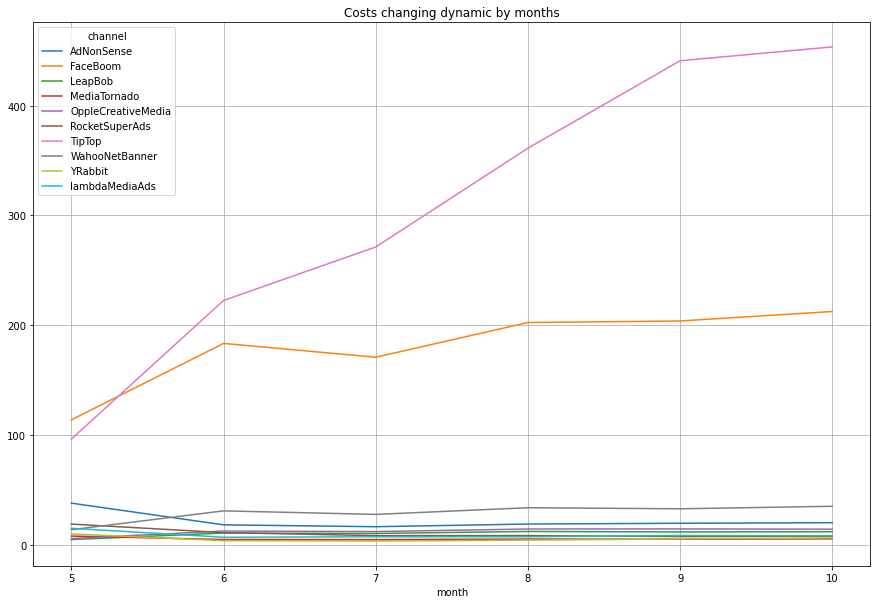

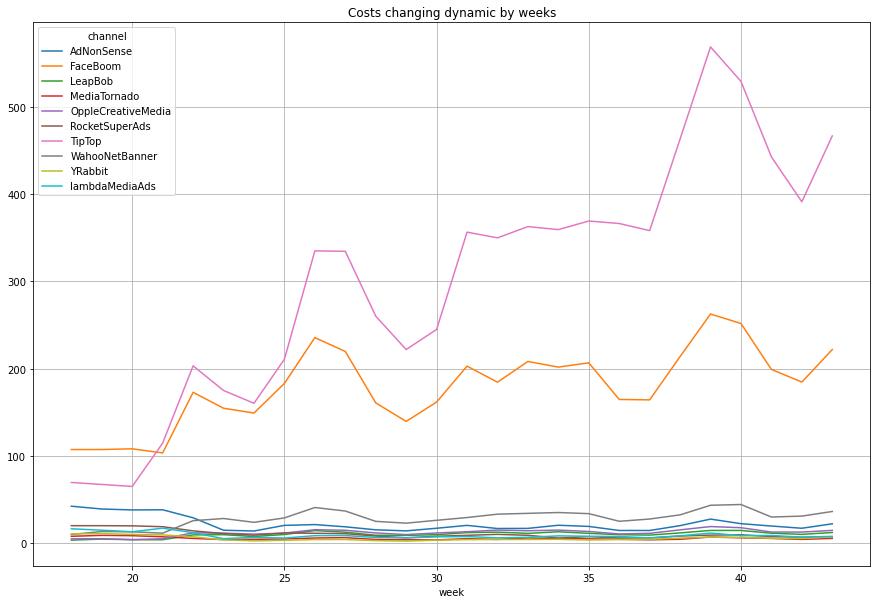

In [26]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
table_by_month = costs.pivot_table(index = 'month', values ='costs' , columns = 'channel', aggfunc = 'mean')
table_by_month.plot(grid = True, figsize=(15, 10)).set(title = 'Costs changing dynamic by months')

table_by_week = costs.pivot_table(index = 'week', values ='costs' , columns = 'channel', aggfunc = 'mean')
table_by_week.plot(grid = True, figsize=(15, 10)).set(title = 'Costs changing dynamic by weeks')

The graphs also show the priority channels TipTop, FaceBoom. It is also noticeable that TipTop's cost curve has a steeper slope than the rest, which indicates a rapid increase in advertising costs in this source for May-October 2019

Find out how much it costs on average to attract one user (CAC) from each source

In [27]:
print(f'Average CAC per user for the entire project is {profiles["acquisition_cost"].mean()}')
profiles.groupby(by='channel').agg({'acquisition_cost':'mean'}).sort_values(by = 'acquisition_cost', ascending = False)

Average CAC per user for the entire project is 0.7032778251827625


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


The table also shows that TipTop has the highest CAC, followed by FaceBoom, AdNonSense and lambdaMediaAds. The same companies have CAC above average, the rest - below.v

**Вывод**

- Total Marketing Spend 105497.3
- TipTop, FaceBoom - channels with the highest costs - 51.9% and 30.75% respectively. TipTop costs have only increased over time
- The highest CAC for the same companies.(TipTop - 2,8; FaceBoom - 1,1)

## ROI Estimation<a id='ROI'></a>

### Analysis of the return on advertising in general

In [28]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

profiles = profiles.query('channel != "organic"')

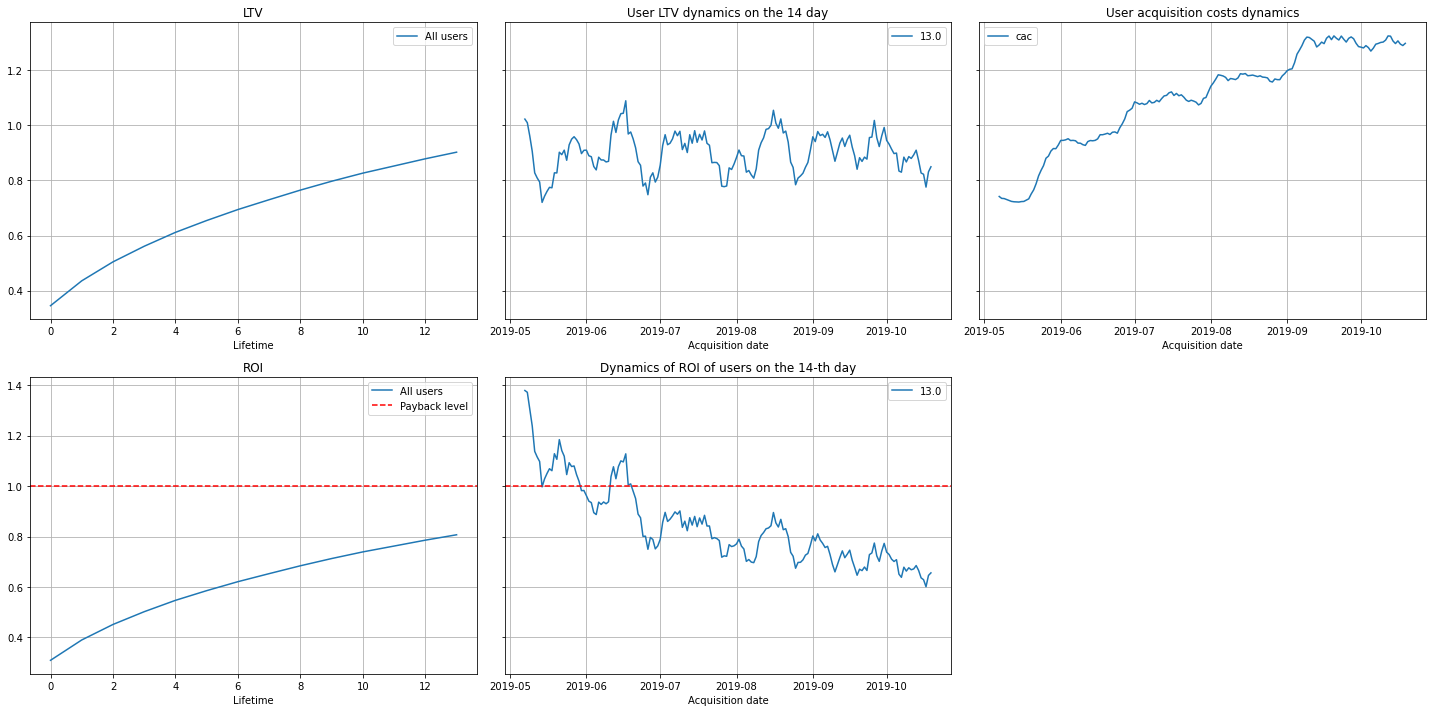

In [29]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- LTV is quite stable
- The cost of customer acquisition is steadily growing, the fastest growth occurred in the period May-June 2019
- Contrary to the description, in 14 days ROI does not reach the payback threshold
- Over time, the ROI on day 14 gets lower, this is due to the faster increase in CAC compared to LTV

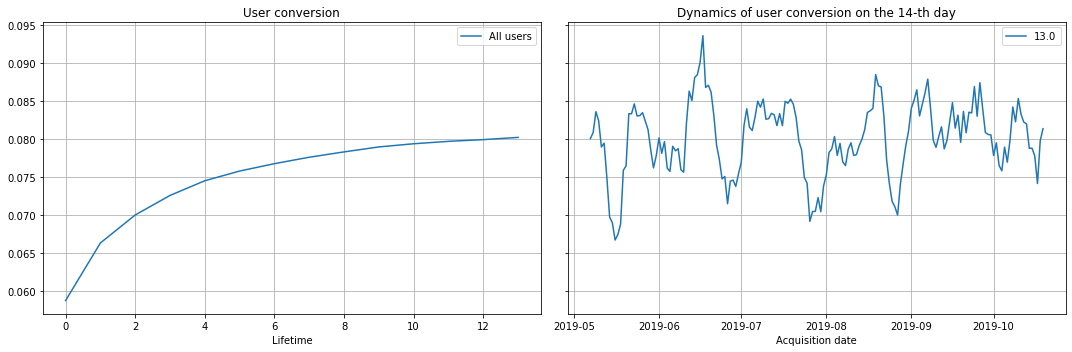

In [30]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

The conversion curve looks believable. It can be seen from the dynamics that the conversion has increased over time.

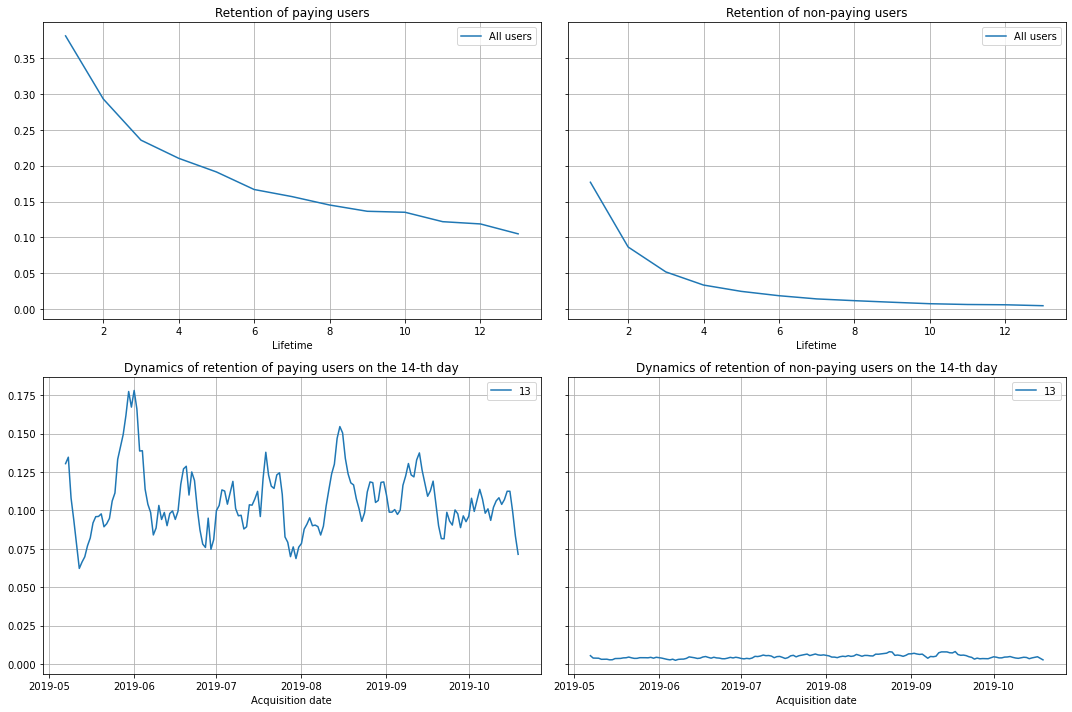

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

The retention curve looks plausible, it has been on the decline in the last month

### Ad return of investment analysis by device

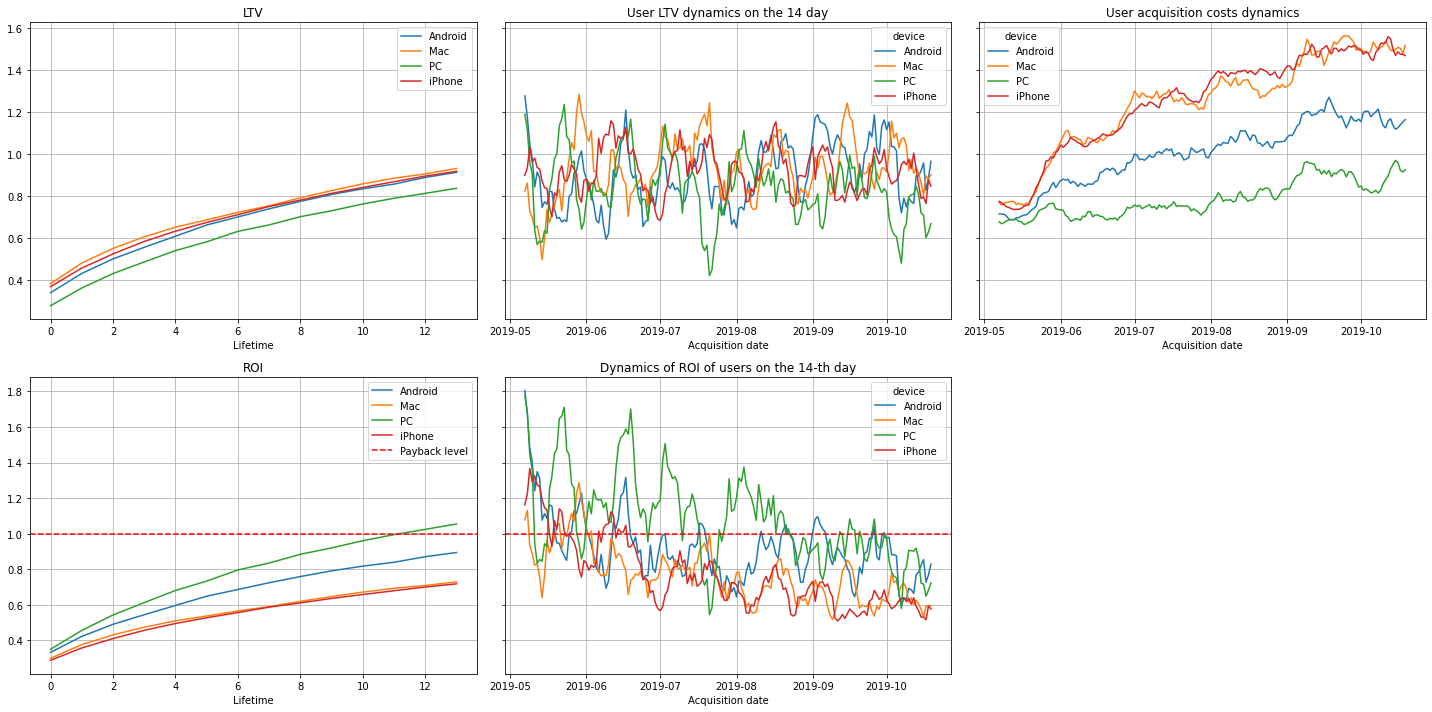

In [32]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV on all devices is stable, with higher LTV for iPhone and Mac users, however, according to the dynamics of the cost of user acquisition, it can be seen that after May, the cost of attracting iPhone and Mac users increased significantly compared to Android and PC.

On the horizon of 14 days, the costs are not paid off for iPhone, Mac and Android. However, the dynamics of ROI shows that the return on investment for all devices is decreasing.

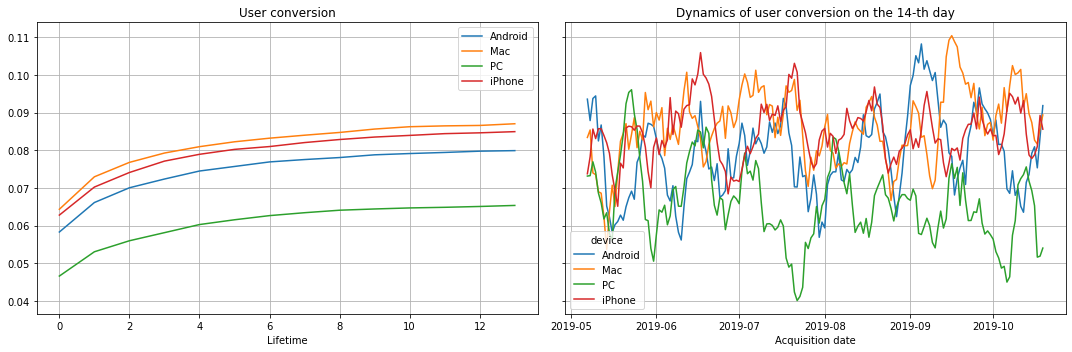

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

From the charts, iPhone and Mac users are converting well and consistently. Let's look at retention

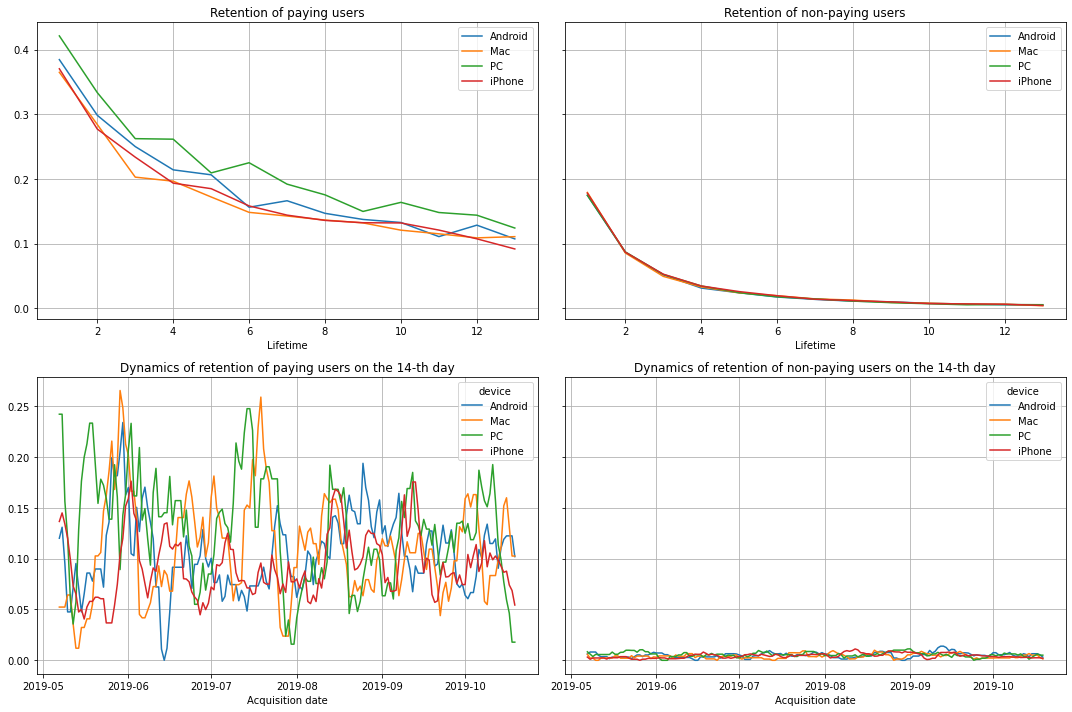

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

PC user retention is the highest, but in principle the numbers do not vary much by device

###  Analysis of advertising ROI by country

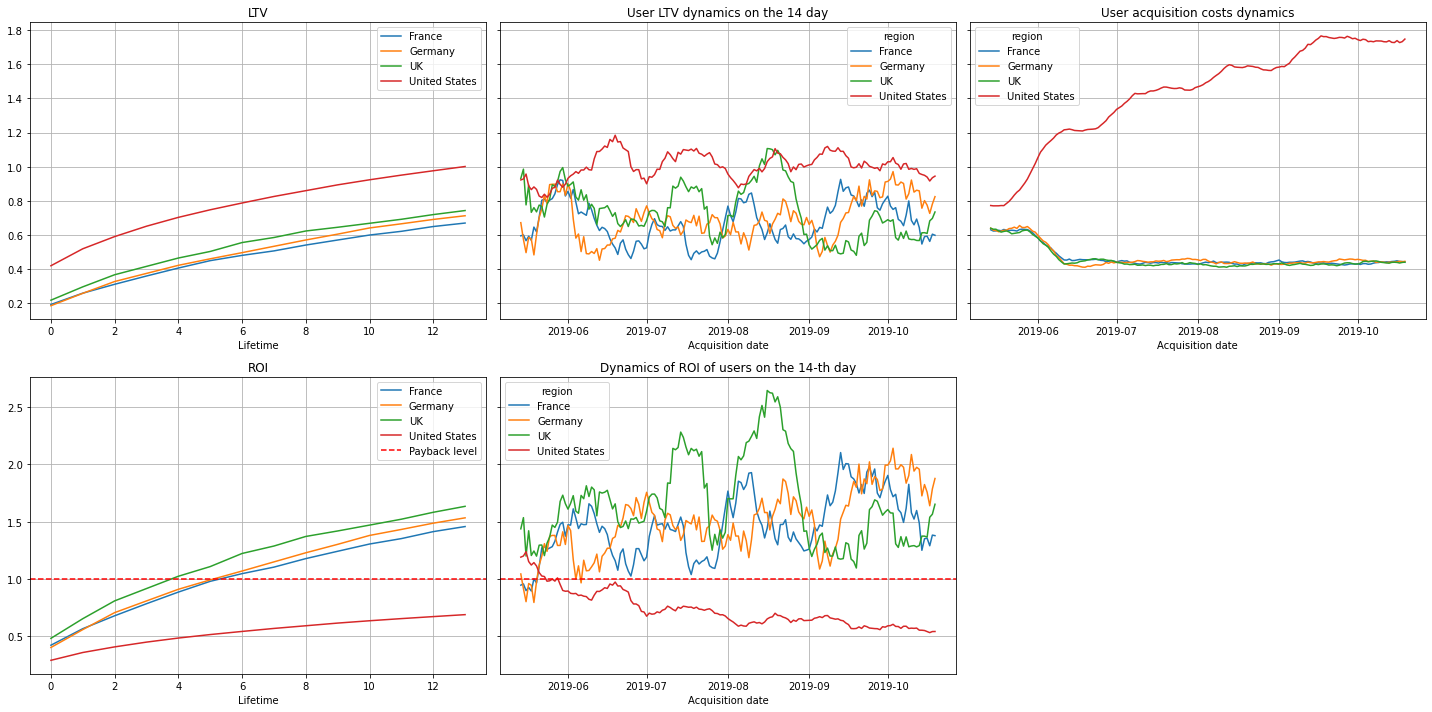

In [35]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

LTV is also stable for all regions, with US LTV being highlighted. It is achieved by investing in user acquisition. In the US, this figure is much higher than in France, Germany and the UK. In the latter, acquisition costs have even decreased. 

It can be seen that the US ROI is below the payback level, as opposed to other countries. And the trend is negative. The United States needs to be considered separately

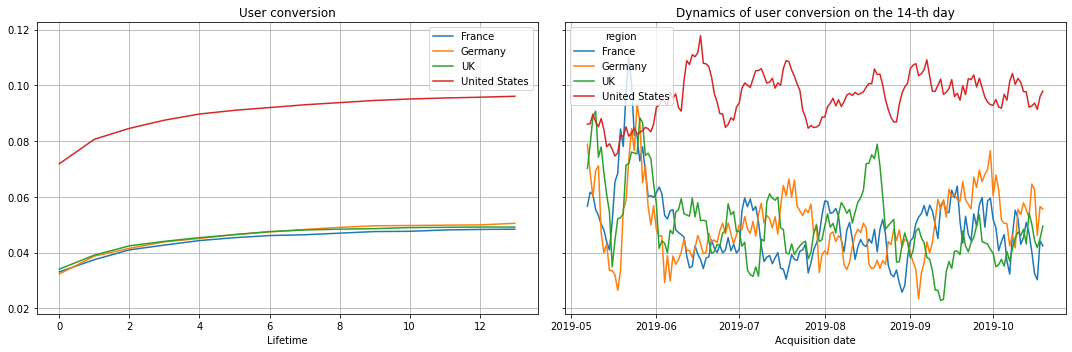

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

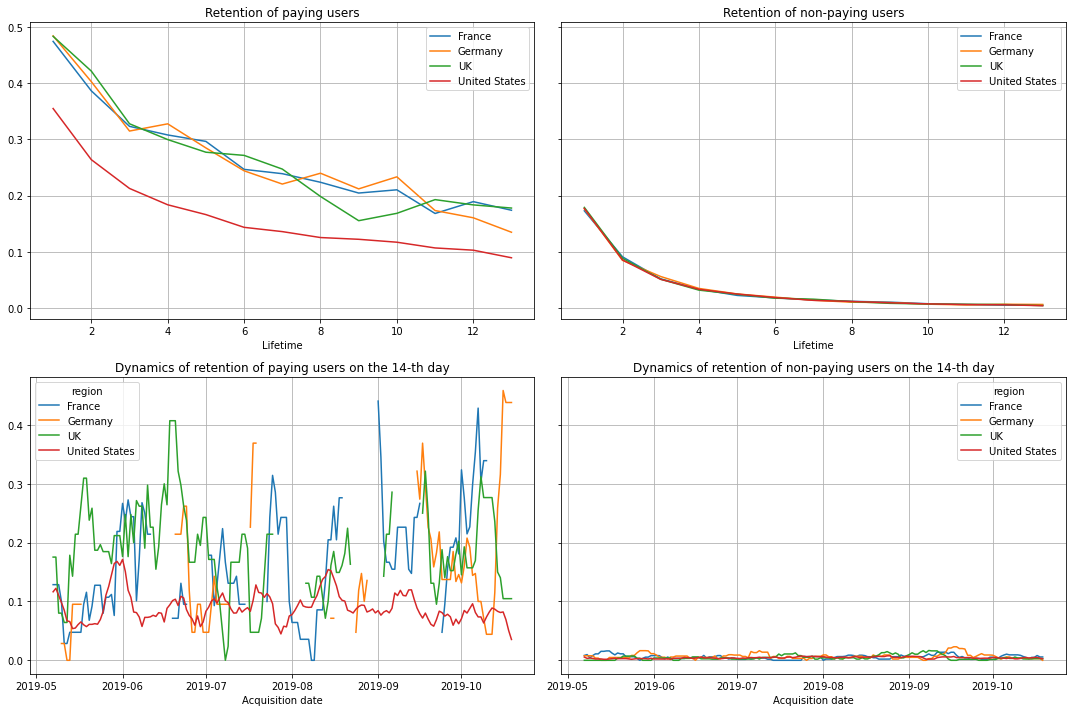

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

The US has the highest user conversion rate, and retention is lower than in other countries, but not by much.

#### Advertising in the USA

Calculate the number of unique users by month, and calculate the share of paying users

In [38]:
display(profiles.query('region == "United States"').groupby(by=['month']).agg({'user_id':'nunique'}))
month_users = profiles.query('region == "United States"').groupby(by=['month']).agg({'user_id':'nunique'})
month_payer = profiles.query('region == "United States" and payer == True').groupby(by=['month']).agg({'user_id':'nunique'})
month_payer['share'] = month_payer['user_id']/month_users['user_id']*100
month_payer

,user_id
month,
2019-05-01,8553
2019-06-01,10005
2019-07-01,9777
2019-08-01,11416
2019-09-01,11411
2019-10-01,10667


,user_id,share
month,,
2019-05-01,748,8.745469
2019-06-01,1018,10.174913
2019-07-01,987,10.095121
2019-08-01,1139,9.977225
2019-09-01,1171,10.262028
2019-10-01,1045,9.796569


The first table shows that the number of users increased in June and then in August. The same is true in percentage terms, however, the share of those who pay has not increased much compared to May

Let's look at data by channel for the last three months

In [39]:
profiles.query('region == "United States" and month > "2019-07-01"').groupby(by=['channel']).agg({'user_id':'nunique', 'acquisition_cost':'mean'}).sort_values(by=['user_id'], ascending = False)

,user_id,acquisition_cost
channel,,
FaceBoom,16277,1.113584
TipTop,10979,3.341333
RocketSuperAds,2139,0.316613
YRabbit,2062,0.213841
MediaTornado,2037,0.215729


In the US, too, more users are attracted from FaceBoom and TipTop, but at the moment, the cost per user acquisition from TipTop is the highest.

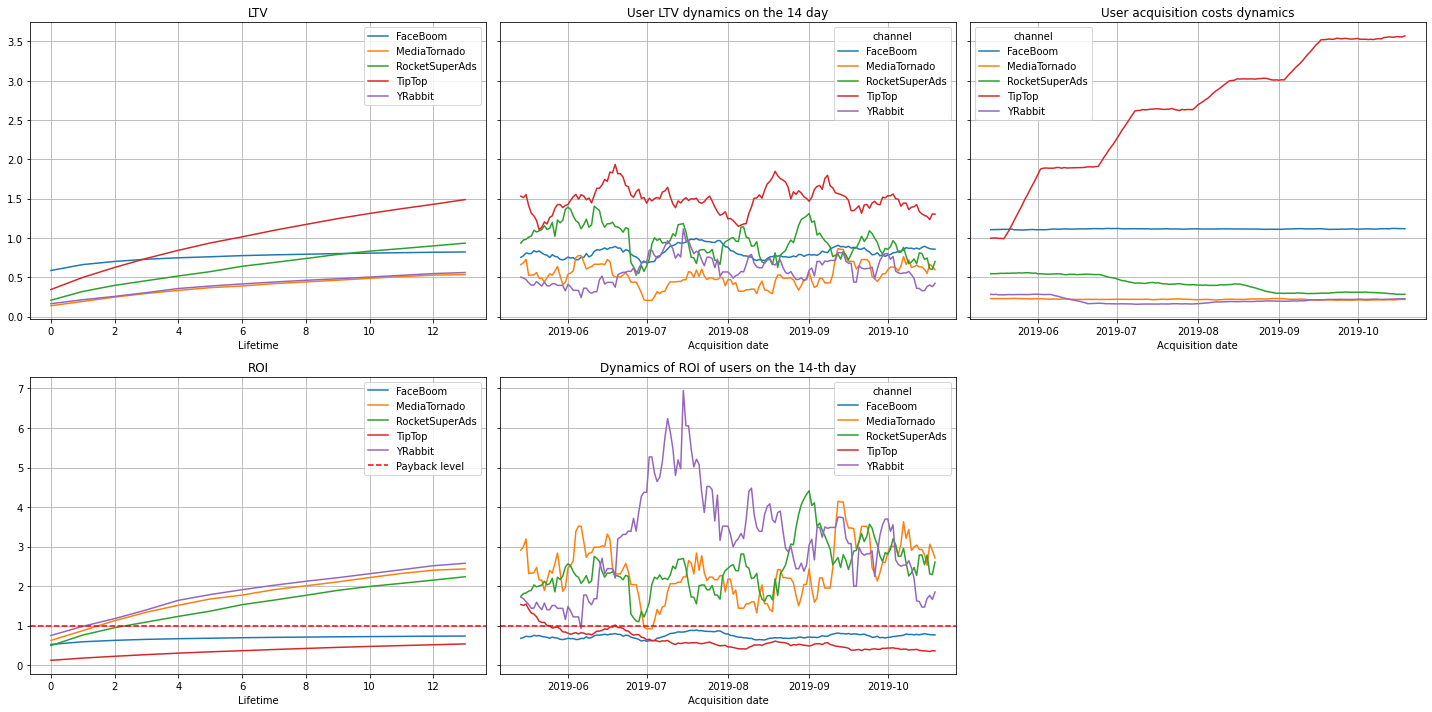

In [40]:
profiles_usa = profiles.query('region == "United States"')

dimensions_usa = ['channel']

ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions_usa
)

plot_ltv_roi(ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa, horizon_days, window=14) 

The graphs also show that in the US, the main investments are in the TipTop and FaceBoom channels, however, judging by the LTV, the **RocketSuperAds** channel is the most promising. It has a high level of LTV, despite the decrease in investments in this acquisition channel, and ROI is above the payback level. And for all the months of the study, it never went lower, unlike TipTop and FaceBoom.

You can also bet on MediaTornado and YRabbit for similar reasons, and TipTop clearly needs to be lowered.


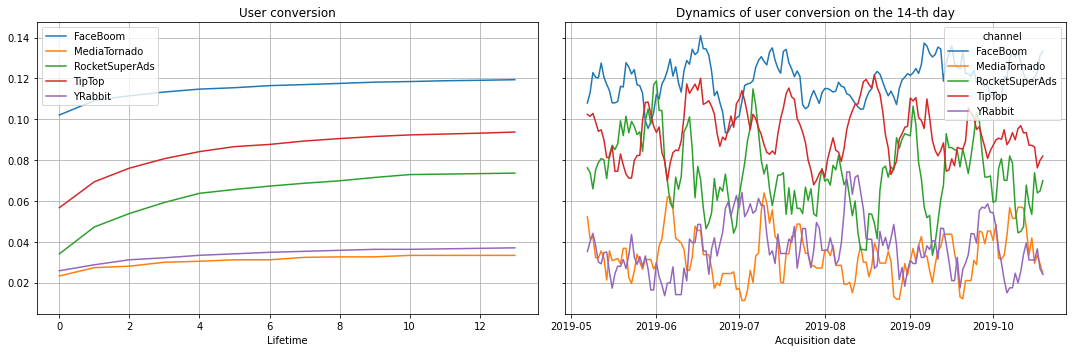

In [41]:
conversion_raw_usa, conversion_grouped_usa, conversion_history_usa = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions_usa)

plot_conversion(conversion_grouped_usa, conversion_history_usa, horizon_days)

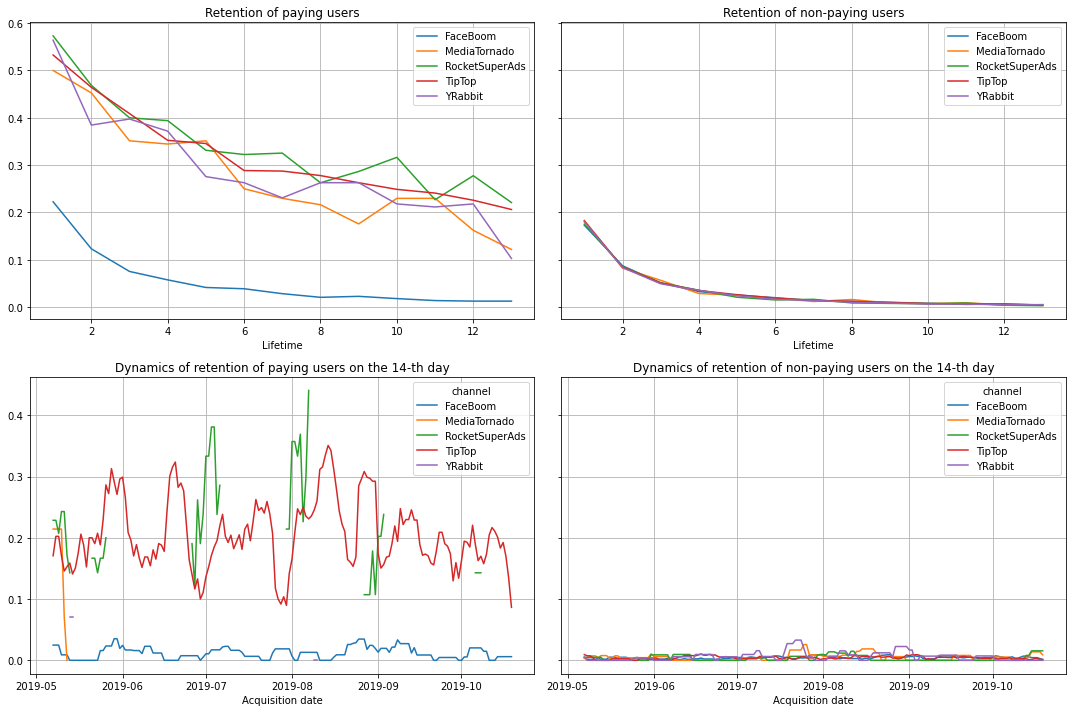

In [42]:
retention_raw_usa, retention_grouped_usa, retention_history_usa = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions_usa
)

plot_retention(retention_grouped_usa, retention_history_usa, horizon_days) 

The conversion and retention graphs show that despite the high conversion of the FaceBoom channel, it has a very low retention, which is why it is not profitable to invest.

Users of the TipTop channel have both a high conversion rate and a normal retention rate compared to other channels. However, apparently, in this channel, the attraction of the maximum possible number of users is carried out at the expense of lower costs.

Of the three channels RocketSuperAds, MediaTornado and YRabbit, the former looks like the most promising investment.

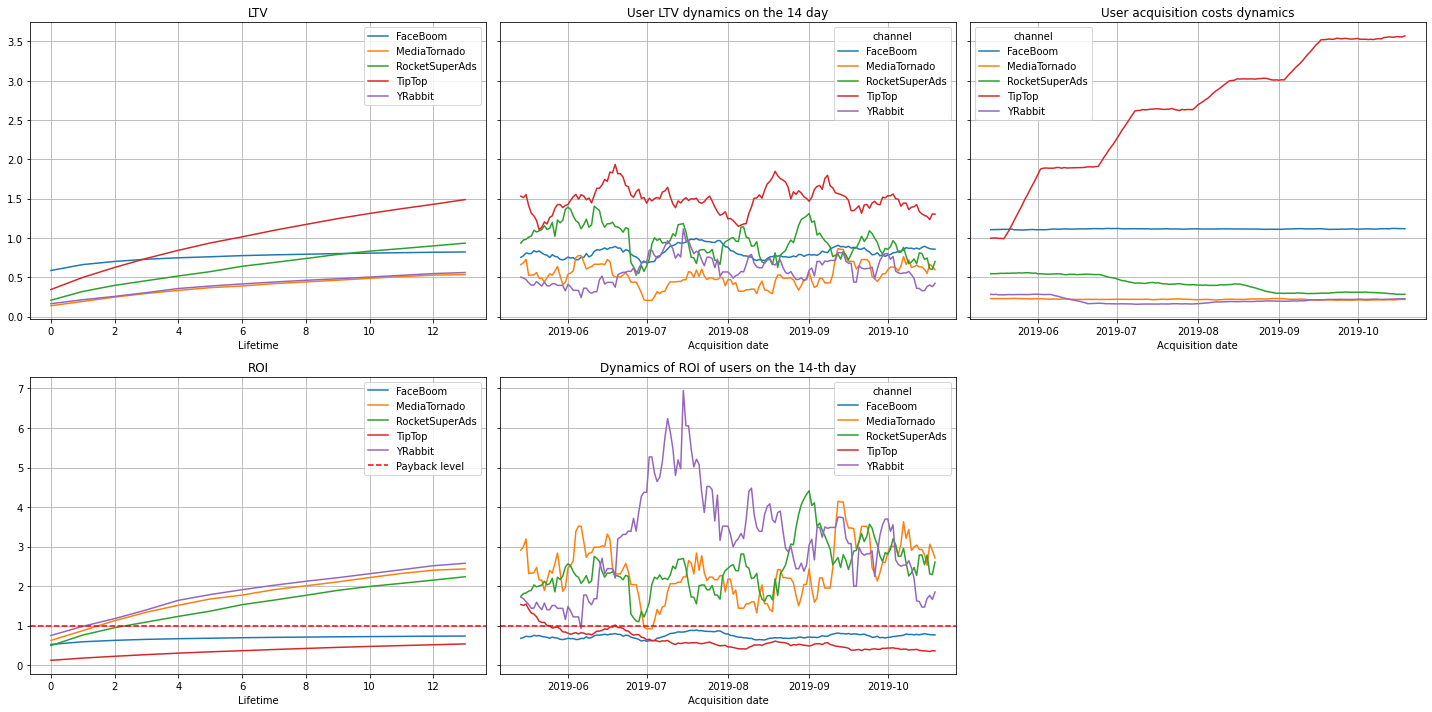

In [43]:
dimensions_usa = ['channel']

ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions_usa
)

plot_ltv_roi(ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa, horizon_days, window=14) 

The failure of an advertising campaign in the United States does not depend on devices

#### Europe

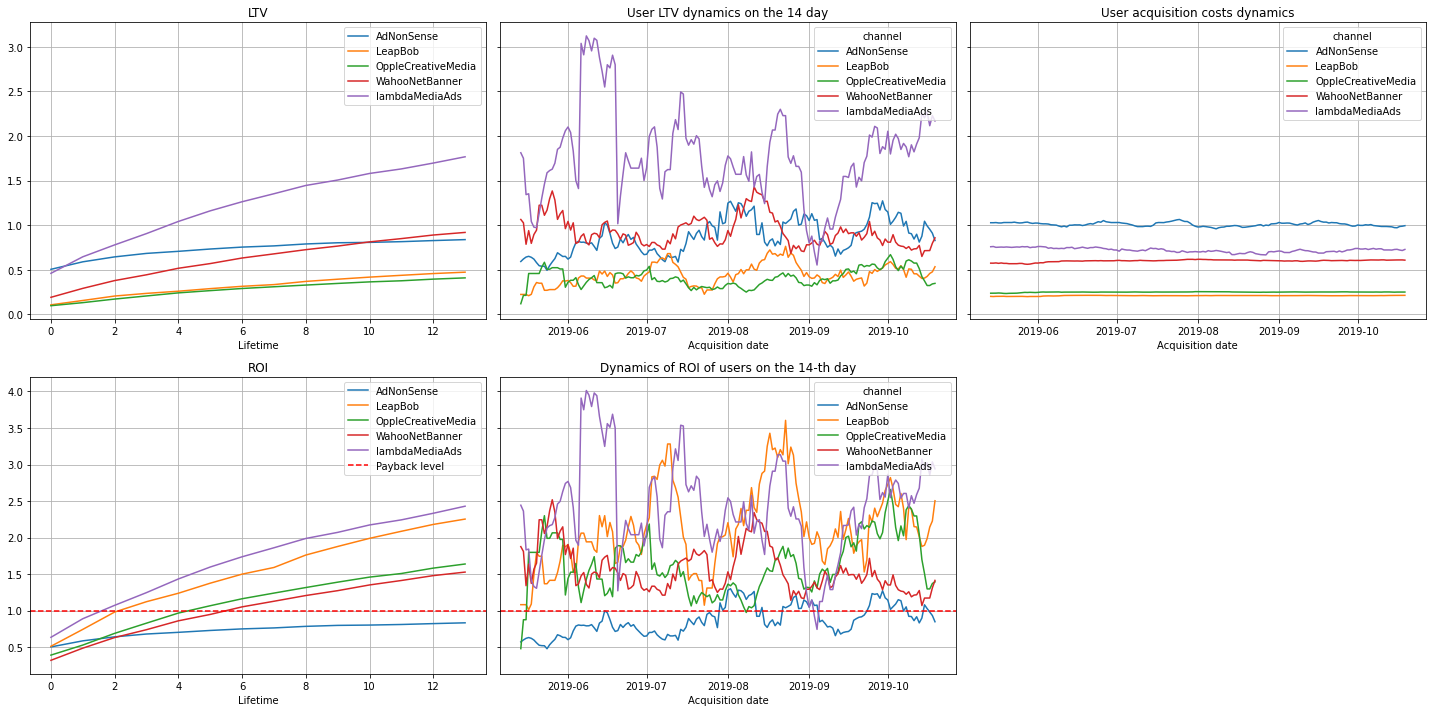

In [44]:
profiles_eu = profiles.query('region != "United States"')

dimensions_eu = ['channel']

ltv_raw_eu, ltv_grouped_eu, ltv_history_eu, roi_grouped_eu, roi_history_eu = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions_eu
)

plot_ltv_roi(ltv_grouped_eu, ltv_history_eu, roi_grouped_eu, roi_history_eu, horizon_days, window=14) 

In Europe, promising channels are lambdaMediaAbs, LeapBob, OppleCreativeMedia and WahooNetBanner

### Analysis of advertising ROIn by advertising channels

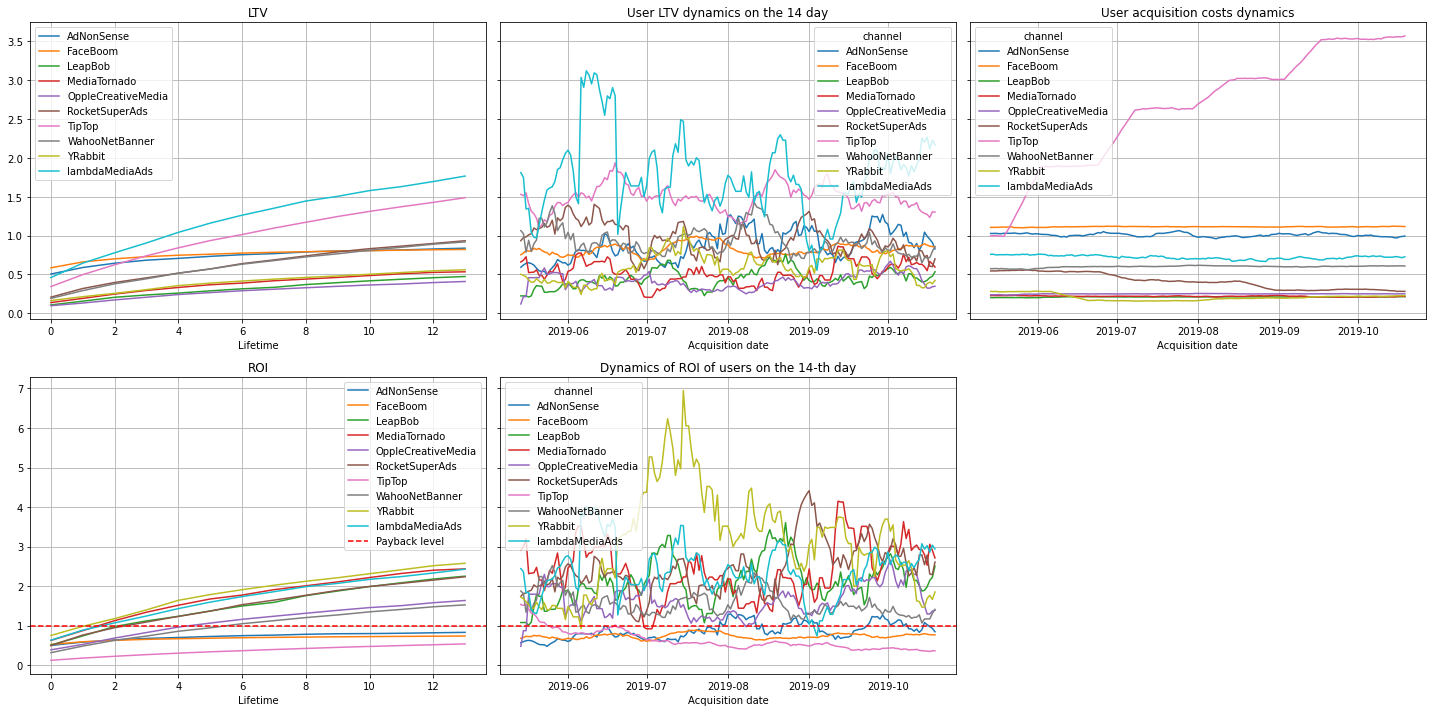

In [45]:
dimensions = ['channel']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

LambdaMediaAds is a very promising channel. On the horizon of 14 days, its LTV reaches the highest value compared to other channels (However, we observed a drawdown in September). User acquisition costs are stable there, and payback is achieved in two days.

AdNonSense, FaceBoom and TipTop channels do not reach the payback level. At the same time, the cost of TipTop has increased significantly in 6 months. And on AdNonSense, FaceBoom they are stable.

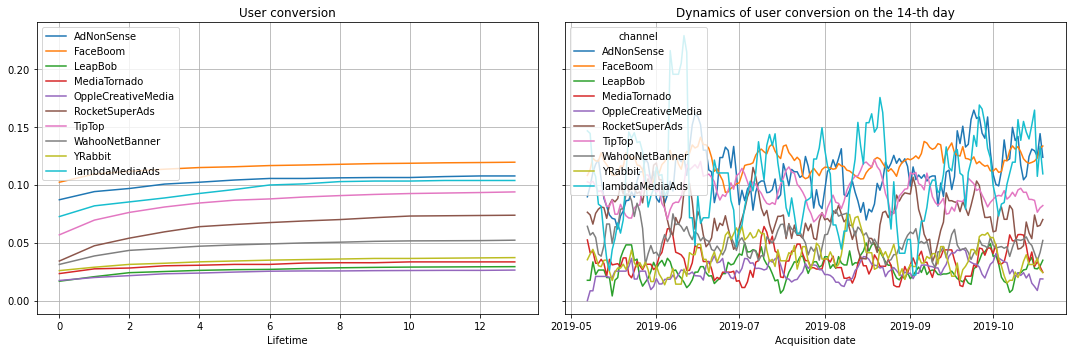

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

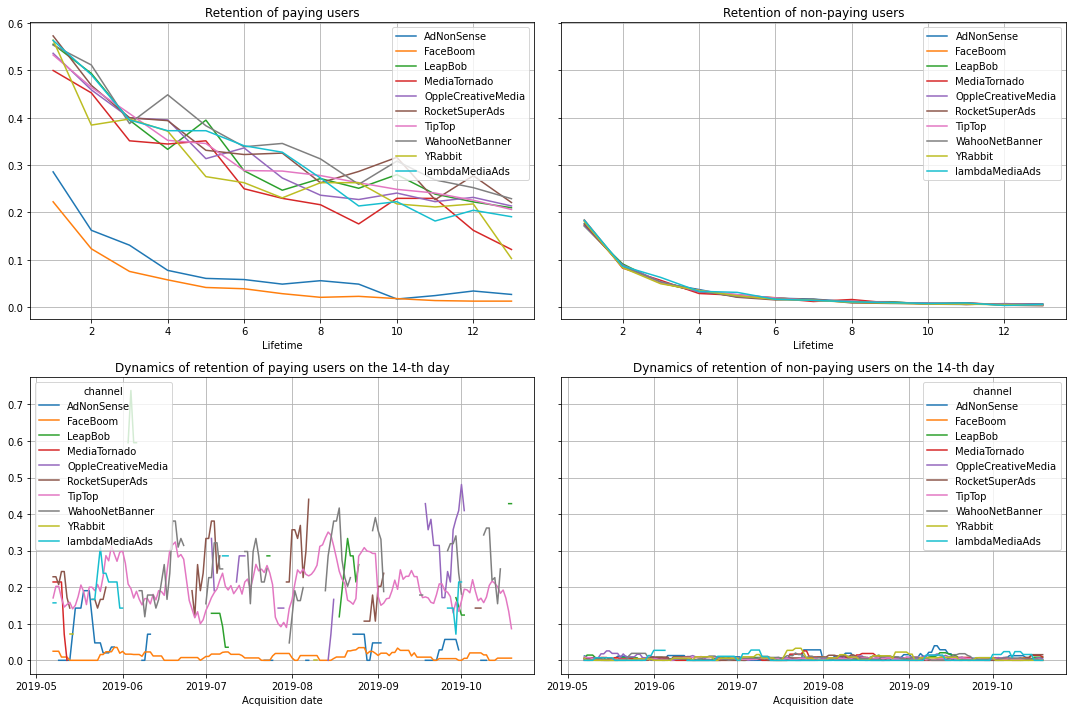

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Despite high conversions in the AdNonSense and FaceBoom channels, the retention of paying users in them is low.

The lambdaMediaAbs, TipTop and RocketSuperAds channels have good performance

**Thus** promising investment channels are lambdaMediaAbs and RocketSuperAds. TipTop channel costs need to be reduced as they do not pay off

## Conclusion<a id='concl'></a>

**General information**
1. 
- The largest market is the US market. It also has the highest share of paying users 6.9%
- Most users use iPhone, the share of paying users of this device is 6.2%. MAC has the highest share of paying users - 6.4%
- Most of the clients came from channels organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob. Нhowever, the share of paying users is highest for channels FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

2. 

- Total Marketing Spend 105497.3 
- TipTop, FaceBoom - channels with the highest costs - 51.9% and 30.75% respectively. TipTop costs have only increased over time
- The highest CAC for the same companies.(TipTop - 2,8; FaceBoom - 1,1)


**Devices**

*Issues*: On the horizon 14 days, the costs do not pay off for iPhone, Mac and Android

**Country**

*Issues*: US ROI not reaching payback level.

**Channels**

*Issues*: AdNonSense, FaceBoom and TipTop channels do not reach the payback level. The main disadvantage of the TipTop channel is an increase in CAC, FaceBoom and AdNonSense - low retention

*Recommendation*: In general, promising investment channels are lambdaMediaAbs, RocketSuperAds, YRabbit. TipTop channel costs need to be reduced as they do not pay off

**Considering the US separately**

*Issues*:
- The increase in CAC did not lead to a significant increase in paying users.
- The main attraction channels are FaceBoom and TipTop, they are the most spent funds, but the ROI level is not achieved. (TipTop - due to high CAC, FaceBoom - due to low payback)

*Recommendation*: In the US market, the channels RocketSuperAds, MediaTornado and YRabbit look like suitable for investment, the first one looks the most promising for investment.

**Consideration of Europe**

*Issues* AdNonSense channels not reaching payback level

*Recommendation*: In Europe, promising channels are lambdaMediaAbs, LeapBob, OppleCreativeMedia and WahooNetBanner